# Tutorial1 pCO2 time series analysis

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy import stats
from scipy import interpolate

## Define path to the data storage (depends on your system)

In [79]:
dir10='/glade/p/univ/ugit0016/rso/ecoUFZ.64t.10km.42lev/ver821/netcdf/'
diro='/glade/work/ito/dataset/ocean/'

## assemble observational pCO2 time series (6 products from Seaflux)

In [80]:
# SeaFlux
do=xr.open_dataset(diro+'SeaFlux/SeaFlux_v2021.04_spco2_SOCOM_unfilled_1982-2019.nc')
pco2o=do.sel(time=slice("2008-01-01","2016-12-31"))
plab=['JENA_MLS','MPI_SOMFFN','CMEMS_FFNN','CSIR_ML6','JMA_MLR','NIES_FNN']

In [81]:
obs=np.empty((12*9,6))
N30=12*9
for i in range(0,6):
    pr=plab[i]
    tmp=pco2o[pr].sel(lon=slice(-160,-115)).sel(lat=slice(-60,-48)).mean(('lon','lat'))
    timeo=pco2o['time']
    obs[:,i]=tmp.to_numpy()

## assemble 10km result

In [82]:
ds10=xr.open_dataset(dir10+'pco2.nc')
pco2=ds10.pco2.sel(lon=slice(200,245)).sel(lat=slice(-60,-48))
pco2ts10=pco2.mean(('lon','lat')).to_numpy()
N5=np.size(pco2ts10)

## assemble B-SOSE result

In [83]:
ds=xr.open_dataset(diro+'BSOSE/bsose_i105_2008to2012_monthly_pCO2.nc')
pco2=ds['BLGPCO2'].sel(XC=slice(200,245)).sel(YC=slice(-60,-48))
pco2tsBSOSE_i105=pco2.mean(('XC','YC')).to_numpy()*1e6
ds=xr.open_dataset(diro+'BSOSE/bsose_i106_2008to2012_monthly_pCO2.nc')
pco2=ds['BLGPCO2'].sel(XC=slice(200,245)).sel(YC=slice(-60,-48))
pco2tsBSOSE0=pco2.mean(('XC','YC')).to_numpy()
ds=xr.open_dataset(diro+'BSOSE/bsose_i133_2013to2018_monthly_pCO2.nc')
pco2=ds['BLGPCO2'].sel(XC=slice(200,245)).sel(YC=slice(-60,-48)).sel(time=slice('2008-01','2016-12'))
pco2tsBSOSE1=pco2.mean(('XC','YC')).to_numpy()
pco2BSOSE=np.concatenate((pco2tsBSOSE0,pco2tsBSOSE1),axis=None)*1e6

In [84]:
time=np.linspace(2008,2017-1/72,N5)
timeo2=np.linspace(2008,2017-1/12,N30)
time3=np.linspace(2008,2013-1/12,60)

## plot everything together

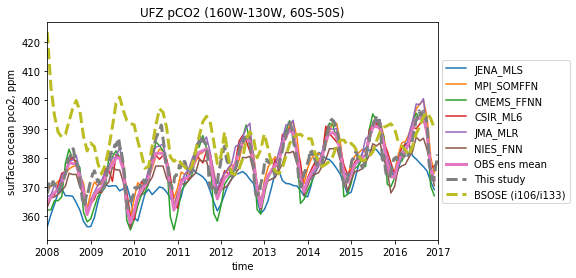

In [85]:
obsm=np.mean(obs[:,1:],1)
fig=plt.figure(figsize=(7,4))
plt.plot(timeo2,obs,label=plab)
plt.plot(timeo2,obsm,label='OBS ens mean',linewidth=3)
#
plt.plot(time,pco2ts10*1e6,'--',label='This study',linewidth=3)
plt.plot(timeo2,pco2BSOSE,'--',label='BSOSE (i106/i133)',linewidth=3)
#plt.plot(time3,pco2tsBSOSE_i105,'--',label='BSOSE (i105)',linewidth=3)
#
plt.legend(bbox_to_anchor=(.85,.35,.5,.5))
plt.xlabel('time')
plt.xlim(2008,2017)
plt.title('UFZ pCO2 (160W-130W, 60S-50S)')
plt.ylabel('surface ocean pco2, ppm')
plt.savefig('UFZ_pco2_timeseries.pdf',bbox_inches="tight")
plt.show()

## mean seasonal cycle comparison

In [86]:
r,p=stats.pearsonr(obsm,pco2BSOSE)
print('R = '+str(r)+' : p value = '+str(p))

R = -0.022033955673610193 : p value = 0.8209318859834845


In [87]:
pco2mo = interpolate.interp1d(time,pco2ts10,'linear')
r,p=stats.pearsonr(obsm,pco2mo(timeo2))
print('R = '+str(r)+' : p value = '+str(p))

R = 0.8910021971542971 : p value = 3.847373181818718e-38
